# Copy images to other folders

In [3]:
import pandas as pd
import numpy as np
import glob
import shutil
from os import rename
import os
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

In [1]:
pwd

'/sfs/qumulo/qproject/sds-capstone-aaai/met/logan'

In [47]:
os.chdir('/sfs/qumulo/qproject/sds-capstone-aaai/met/logan')
dbimg= pd.read_csv('trainset.csv',lineterminator='\n')
dbimg.head()

/apps/software/standard/core/anaconda/5.2.0-py3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (11,12,13,14,15,22,23,24,33,34,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,objectID,isHighlight,accessionNumber,isPublicDomain,primaryImage,primaryImageSmall,additionalImages,constituents,department,objectName,title,culture,period,dynasty,reign,portfolio,artistRole,artistPrefix,artistDisplayName,artistDisplayBio,artistSuffix,artistAlphaSort,artistNationality,artistBeginDate,artistEndDate,objectDate,objectBeginDate,objectEndDate,medium,dimensions,creditLine,geographyType,city,state,county,country,region,subregion,locale,locus,excavation,river,classification,rightsAndReproduction,linkResource,metadataDate,repository,objectURL,tags,Object ID,Tags
0,34,False,1970.289.6,True,https://images.metmuseum.org/CRDImages/ad/orig...,https://images.metmuseum.org/CRDImages/ad/web-...,[],"[{'role': 'Maker', 'name': 'Forestville Manufa...",The American Wing,Clock,Acorn Clock,American,NaN,NaN,NaN,NaN,Maker,NaN,Forestville Manufacturing Company,1835–1853,NaN,Forestville Manufacturing Company,NaN,1835,1853,1847–50,1847.0,1850.0,"Mahogany, laminated",24 3/8 x 14 5/8 x 5 1/8 in. (61.9 x 37.1 x 13 cm),"Gift of Mrs. Paul Moore, 1970",Made in,Bristol,Connecticut,NaN,united states,New England,NaN,NaN,NaN,NaN,NaN,Furniture,NaN,NaN,2019-07-31T03:00:40.447Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,"['landscapes', 'boats']",34,Landscapes|Boats
1,37,False,38.165.51,True,https://images.metmuseum.org/CRDImages/ad/orig...,https://images.metmuseum.org/CRDImages/ad/web-...,['https://images.metmuseum.org/CRDImages/ad/or...,"[{'role': 'Maker', 'name': 'Pierre Stephan'}]",The American Wing,Figure,Figure of Admiral George Rodney,British (American market),NaN,NaN,NaN,NaN,Maker,NaN,Pierre Stephan,"French, active ca. 1770–95",NaN,"Stephan, Pierre",French,1765,1795,ca. 1785,1782.0,1785.0,"Earthenware, basalt",H. 12 in. (30.5 cm),"Harris Brisbane Dick Fund, 1938",Made in,NaN,NaN,Staffordshire,england,West Midlands,NaN,NaN,NaN,NaN,NaN,Ceramics,NaN,NaN,2019-02-01T10:50:49.477Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,"['cannons', 'swords', 'men']",37,Cannons|Swords|Men
2,38,False,38.165.50,True,https://images.metmuseum.org/CRDImages/ad/orig...,https://images.metmuseum.org/CRDImages/ad/web-...,['https://images.metmuseum.org/CRDImages/ad/or...,"[{'role': 'Maker', 'name': 'Pierre Stephan'}]",The American Wing,Figure,Figure of Admiral Samuel Hood,British (American market),NaN,NaN,NaN,NaN,Maker,NaN,Pierre Stephan,"French, active ca. 1770–95",NaN,"Stephan, Pierre",French,1765,1795,ca. 1785,1782.0,1785.0,"Earthenware, basalt",H. 12 3/8 in. (31.4 cm),"Harris Brisbane Dick Fund, 1938",Made in,NaN,NaN,Staffordshire,england,West Midlands,NaN,NaN,NaN,NaN,NaN,Ceramics,NaN,NaN,2019-02-01T10:50:49.477Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,"['cannons', 'swords', 'men', 'admirals']",38,Cannons|Swords|Men|Admirals
3,39,False,18.11.10,True,https://images.metmuseum.org/CRDImages/ad/orig...,https://images.metmuseum.org/CRDImages/ad/web-...,[],None,The American Wing,Advertisement,Advertisement for Norwich Stone Ware Factory,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1770–1800,1770.0,1800.0,Paper,11 x 9 in. (27.9 x 22.9 cm),"Rogers Fund, 1918",Made in,Norwich,Connecticut,NaN,united states,New England,NaN,NaN,NaN,NaN,NaN,Natural Substances,NaN,NaN,2019-02-01T10:50:49.477Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,['advertisements'],39,Advertisements
4,50,False,10.125.447a,True,https://images.metmuseum.org/CRDImages/ad/orig...,https://images.metmuseum.org/CRDImages/ad/web-...,['https://images.metmuseum.org/CRDImages/ad/or...,None,The American Wing,Andiron,Andiron,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1770–1800,1770.0,1800.0,Iron,H. 11 1/2 in. (29.2 cm),"Gift of Mrs. Russell Sage, 1909",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,NaN,2019-07-26T03:00:41.71Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseu

### 1. Filtering the data with Tags only used once

In [3]:
dbimg['Tags'] = dbimg['Tags'].str.split('|')
onetag = dbimg[dbimg['Tags'].str.len()==1]

# Only tagged once
mentag = dbimg[dbimg['Tags']=='Men']
womentag = dbimg[dbimg['Tags']=='Women']
flowertag = dbimg[dbimg['Tags']=='Flowers']
birdtag = dbimg[dbimg['Tags']=='Birds']
print(len(mentag),len(womentag),len(flowertag),len(birdtag))

In [4]:
onetag['Tags'] = onetag['Tags'].apply(lambda x: ','.join(map(str, x)))

/apps/software/standard/core/anaconda/5.2.0-py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


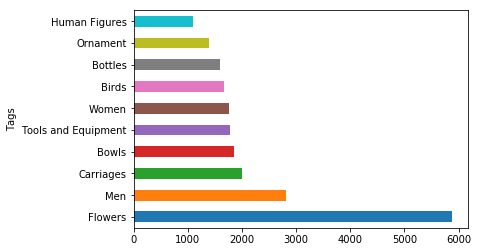

In [7]:
onetag['objectID'].groupby(onetag['Tags']).size().sort_values(ascending=False)[0:10].plot(kind='barh')

In [ ]:
sculpture, hieroglyphs, soldiers, lions, houses, seals, books, vases, ornament, boats, bottles
buildings,horses,architecture,dogs,bowls,landscapes,leaves,trees,birds,flowers,women,men

In [33]:
tagdf['artistDisplayName'].groupby(tagdf['artistDisplayName']).count().sort_values(ascending=False)[0:10]

artistDisplayName
Allen & Ginter         4261
Thomas Rowlandson      2205
Brewster & Co.         2028
W. Duke, Sons & Co.    1955
Stefano della Bella     942
Unknown                 830
Honoré Daumier          826
Meissen Manufactory     812
Albrecht Dürer          792
Utagawa Hiroshige       643
Name: artistDisplayName, dtype: int64

In [22]:
tagdf = dbimg[~pd.isnull(dbimg['tags'])==True]

In [72]:
print(len(df1)+len(df2)+len(df3)+len(df4)+len(df5)+len(df6)+len(df7)+len(df8)+len(df9)+len(df10)+len(df11)+len(df12)+
     len(ds1)+len(ds2)+len(ds3)+len(ds4)+len(ds5)+len(ds6)+len(ds7)+len(ds8)+len(ds9)+len(ds10)+len(ds11))

97009


### 2. Filtering the data with tags

In [47]:
ds1 = tagdf[tagdf['tags'].str.contains('sculpture')]
ds11 = tagdf[~tagdf['tags'].str.contains('sculpture')]

ds2 = ds11[ds11['tags'].str.contains('hieroglyphs')]
ds22 = ds11[~ds11['tags'].str.contains('hieroglyphs')]

ds3 = ds22[ds22['tags'].str.contains('soldiers')]
ds33 = ds22[~ds22['tags'].str.contains('soldiers')]

ds4 = ds33[ds33['tags'].str.contains('lions')]
ds44 = ds33[~ds33['tags'].str.contains('lions')]

ds5 = ds44[ds44['tags'].str.contains('houses')]
ds55 = ds44[~ds44['tags'].str.contains('houses')]

ds6 = ds55[ds55['tags'].str.contains('seals')]
ds66 = ds55[~ds55['tags'].str.contains('seals')]

ds7 = ds66[ds66['tags'].str.contains('books')]
ds77 = ds66[~ds66['tags'].str.contains('books')]

ds8 = ds77[ds77['tags'].str.contains('vases')]
ds88 = ds77[~ds77['tags'].str.contains('vases')]

ds9 = ds88[ds88['tags'].str.contains('ornament')]
ds99 = ds88[~ds88['tags'].str.contains('ornament')]

ds10 = ds99[ds99['tags'].str.contains('boats')]
ds1010 = ds99[~ds99['tags'].str.contains('boats')]

ds11 = ds1010[ds1010['tags'].str.contains('bottles')]
ds1111 = ds1010[~ds1010['tags'].str.contains('bottles')]

df1 = ds1111[ds1111['tags'].str.contains('buildings')]
df11 = ds1111[~ds1111['tags'].str.contains('buildings')]

df2 = df11[df11['tags'].str.contains('horses')]
df22 = df11[~df11['tags'].str.contains('horses')]

df3 = df22[df22['tags'].str.contains('architecture')]
df33 = df22[~df22['tags'].str.contains('architecture')]

df4 = df33[df33['tags'].str.contains('dogs')]
df44 = df33[~df33['tags'].str.contains('dogs')]

df5 = df44[df44['tags'].str.contains('bowls')]
df55 = df44[~df44['tags'].str.contains('bowls')]

df6 = df55[df55['tags'].str.contains('landscapes')]
df66 = df55[~df55['tags'].str.contains('landscapes')]

df7 = df66[df66['tags'].str.contains('leaves')]
df77 = df66[~df66['tags'].str.contains('leaves')]

df8 = df77[df77['tags'].str.contains('trees')]
df88 = df77[~df77['tags'].str.contains('trees')]

df9 = df88[df88['tags'].str.contains('birds')]
df99 = df88[~df88['tags'].str.contains('birds')]

df10 = df99[df99['tags'].str.contains('flowers')]
df1010 = df99[~df99['tags'].str.contains('flowers')]

df11 = df1010[df1010['tags'].str.contains('women')]
df1111 = df1010[~df1010['tags'].str.contains('women')]

df12 = df1111[df1111['tags'].str.contains('men')]
df1212 = df1111[~df1111['tags'].str.contains('men')]

print(len(ds1),len(ds2),len(ds3),len(ds4),len(ds5),len(ds6),len(ds7),len(ds8),len(ds9),len(ds10),len(ds11),
      len(df1),len(df2),len(df3),len(df4),len(df5),len(df6),len(df7),len(df8),len(df9),len(df10),len(df11),len(df12))

1628 1653 1741 2003 1878 1872 1970 1997 1973 1945 2318 2050 2014 2020 2023 2907 2737 4754 3682 4918 9090 18713 21123


2816 1771 5886 1670


### - Extract the object ID and split the data 90:10 train-test

In [69]:
# Shuffle the data
"""
df1 = mentag.sample(frac=1)[:1000]
df2 = womentag.sample(frac=1)[:1000]
df3 = flowertag.sample(frac=1)[:1000]
df4 = birdtag.sample(frac=1)[:1000]
"""
men = df12.sample(frac=1)['objectID']
mentrain, mentest = train_test_split(men, test_size = 0.1)

women = df11.sample(frac=1)['objectID']
womentrain, womentest = train_test_split(women, test_size = 0.1)

flowers = df10.sample(frac=1)['objectID']
flowerstrain, flowerstest = train_test_split(flowers, test_size = 0.1)

birds = df9.sample(frac=1)['objectID']
birdstrain, birdstest = train_test_split(birds, test_size = 0.1)

trees = df8.sample(frac=1)['objectID']
treestrain, treestest = train_test_split(trees, test_size = 0.1)

leaves = df7.sample(frac=1)['objectID']
leavestrain, leavestest = train_test_split(leaves, test_size = 0.1)

landscapes = df6.sample(frac=1)['objectID']
landscapestrain, landscapestest = train_test_split(landscapes, test_size = 0.1)

bowls = df5.sample(frac=1)['objectID']
bowlstrain, bowlstest = train_test_split(bowls, test_size = 0.1)

dogs = df4.sample(frac=1)['objectID']
dogstrain, dogstest = train_test_split(dogs, test_size = 0.1)

architecture = df3.sample(frac=1)['objectID']
architecturetrain, architecturetest = train_test_split(architecture, test_size = 0.1)

horses = df2.sample(frac=1)['objectID']
horsestrain, horsestest = train_test_split(horses, test_size = 0.1)

buildings = df1.sample(frac=1)['objectID']
buildingstrain, buildingstest = train_test_split(buildings, test_size = 0.1)

bottles = ds11.sample(frac=1)['objectID']
bottlestrain, bottlestest = train_test_split(bottles, test_size = 0.1)

boats = ds10.sample(frac=1)['objectID']
boatstrain, boatstest = train_test_split(boats, test_size = 0.1)

ornament = ds9.sample(frac=1)['objectID']
ornamenttrain, ornamenttest = train_test_split(ornament, test_size = 0.1)

vases = ds8.sample(frac=1)['objectID']
vasestrain, vasestest = train_test_split(vases, test_size = 0.1)

books = ds7.sample(frac=1)['objectID']
bookstrain, bookstest = train_test_split(books, test_size = 0.1)

seals = ds6.sample(frac=1)['objectID']
sealstrain, sealstest = train_test_split(seals, test_size = 0.1)

houses = ds5.sample(frac=1)['objectID']
housestrain, housestest = train_test_split(houses, test_size = 0.1)

lions = ds4.sample(frac=1)['objectID']
lionstrain, lionstest = train_test_split(lions, test_size = 0.1)

soldiers = ds3.sample(frac=1)['objectID']
soldierstrain, soldierstest = train_test_split(soldiers, test_size = 0.1)

hieroglyphs = ds2.sample(frac=1)['objectID']
hieroglyphstrain, hieroglyphstest = train_test_split(hieroglyphs, test_size = 0.1)

sculpture = ds1.sample(frac=1)['objectID']
sculpturetrain, sculpturetest = train_test_split(sculpture, test_size = 0.1)


In [108]:
"""
df1 = pd.read_csv('mentag.csv')
df2 = pd.read_csv('womentag.csv')
df3 = pd.read_csv('flowertag.csv')
df4 = pd.read_csv('birdtag.csv')
"""

### - Train, test, valid split (1 Tags)

In [109]:
# train
mentrain = df1[:750]['objectID']
womentrain = df2[:750]['objectID']
flowertrain = df3[:750]['objectID']
birdtrain = df4[:750]['objectID']

# val
"""
menval = df1[500:800]['objectID']
womenval = df2[500:800]['objectID']
flowerval = df3[500:800]['objectID']
birdval = df4[500:800]['objectID']
"""
# test
mentest = df1[750:]['objectID']
womentest = df2[750:]['objectID']
flowertest = df3[750:]['objectID']
birdtest = df4[750:]['objectID']

In [66]:
# contains following tags
"""
mentag = dbimg[dbimg['Tags'].str.contains('Men')==True]
womentag = dbimg[dbimg['Tags'].str.contains('Women')==True]
flowertag = dbimg[dbimg['Tags'].str.contains('Flowers')==True]
portag = dbimg[dbimg['Tags'].str.contains('Portraits')==True]
birdtag = dbimg[dbimg['Tags'].str.contains('Birds')==True]
print(len(mentag),len(womentag),len(flowertag),len(birdtag))
"""
src_dir = "/sfs/qumulo/qproject/sds-capstone-aaai/met/logan/Primarysmall/Primarysmall"
dst_dir = "/sfs/qumulo/qproject/sds-capstone-aaai/met/DATA/Pytorch/train"


19010

### - Function for moving images from one directory to other

In [6]:
def moveimg(split, folder, dataframe):
    src_dir = "/sfs/qumulo/qproject/sds-capstone-aaai/met/logan/Primarysmall/Primarysmall"
    # dst_dir = "/sfs/qumulo/qproject/sds-capstone-aaai/met/logan/Primarysmall/Test1/%s/%s"%(split,folder)
    dst_dir = '/sfs/qumulo/qproject/sds-capstone-aaai/met/DATA/Pytorch/%s/%s'%(split,folder)

    for ids in dataframe:
        jpg = '%s.%s'%(ids,'jpg')
        for jpgfile in glob.iglob(os.path.join(src_dir, jpg)):
            shutil.copy(jpgfile, dst_dir)

def moveimgtest(split, dataframe):
    src_dir = "/sfs/qumulo/qproject/sds-capstone-aaai/met/logan/Primarysmall/Primarysmall"
    dst_dir = "/sfs/qumulo/qproject/sds-capstone-aaai/met/logan/Primarysmall/Test1/%s"%(split)

    for ids in dataframe:
        jpg = '%s.%s'%(ids,'jpg')
        for jpgfile in glob.iglob(os.path.join(src_dir, jpg)):
            shutil.copy(jpgfile, dst_dir)
            
def howmany(directory):
    path, dirs, files = next(os.walk("/sfs/qumulo/qproject/sds-capstone-aaai/met/DATA/Pytorch/%s"%(directory)))
    file_count = len(files)
    print("There are",file_count, "Images in the %s Directory"%(directory))

In [71]:
# move train
moveimg('train','men',mentrain)
moveimg('train','women',womentrain)
moveimg('train','flowers',flowerstrain)
moveimg('train','birds',birdstrain)
moveimg('train','trees',treestrain)
moveimg('train','leaves',leavestrain)
moveimg('train','landscapes',landscapestrain)
moveimg('train','bowls',bowlstrain)
moveimg('train','dogs',dogstrain)
moveimg('train','architecture',architecturetrain)
moveimg('train','horses',horsestrain)
moveimg('train','buildings',buildingstrain)
moveimg('train','bottles',bottlestrain)
moveimg('train','boats',boatstrain)
moveimg('train','ornament',ornamenttrain)
moveimg('train','vases',vasestrain)
moveimg('train','books',bookstrain)
moveimg('train','seals',sealstrain)
moveimg('train','houses',housestrain)
moveimg('train','lions',lionstrain)
moveimg('train','soldiers',soldierstrain)
moveimg('train','hieroglyphs',hieroglyphstrain)
moveimg('train','sculpture',sculpturetrain)

In [74]:
# move test
moveimg('test','men',mentest)
moveimg('test','women',womentest)
moveimg('test','flowers',flowerstest)
moveimg('test','birds',birdstest)
moveimg('test','trees',treestest)
moveimg('test','leaves',leavestest)
moveimg('test','landscapes',landscapestest)
moveimg('test','bowls',bowlstest)
moveimg('test','dogs',dogstest)
moveimg('test','architecture',architecturetest)
moveimg('test','horses',horsestest)
moveimg('test','buildings',buildingstest)
moveimg('test','bottles',bottlestest)
moveimg('test','boats',boatstest)
moveimg('test','ornament',ornamenttest)
moveimg('test','vases',vasestest)
moveimg('test','books',bookstest)
moveimg('test','seals',sealstest)
moveimg('test','houses',housestest)
moveimg('test','lions',lionstest)
moveimg('test','soldiers',soldierstest)
moveimg('test','hieroglyphs',hieroglyphstest)
moveimg('test','sculpture',sculpturetest)

### - Check how many images in each folders

In [79]:
# train folder
howmany("train/men")
howmany("train/women")
howmany("train/flowers")
howmany("train/birds")
howmany("train/trees")
howmany("train/leaves")
howmany("train/landscapes")
howmany("train/bowls")
howmany("train/dogs")
howmany("train/architecture")
howmany("train/horses")
howmany("train/buildings")
howmany("train/bottles")
howmany("train/boats")
howmany("train/ornament")
howmany("train/vases")
howmany("train/books")
howmany("train/seals")
howmany("train/houses")
howmany("train/lions")
howmany("train/soldiers")
howmany("train/hieroglyphs")
howmany("train/sculpture")

howmany("test/men")
howmany("test/women")
howmany("test/flowers")
howmany("test/birds")
howmany("test/trees")
howmany("test/leaves")
howmany("test/landscapes")
howmany("test/bowls")
howmany("test/dogs")
howmany("test/architecture")
howmany("test/horses")
howmany("test/buildings")
howmany("test/bottles")
howmany("test/boats")
howmany("test/ornament")
howmany("test/vases")
howmany("test/books")
howmany("test/seals")
howmany("test/houses")
howmany("test/lions")
howmany("test/soldiers")
howmany("test/hieroglyphs")
howmany("test/sculpture")


There are 19010 Images in the train/men Directory
There are 16841 Images in the train/women Directory
There are 8181 Images in the train/flowers Directory
There are 4426 Images in the train/birds Directory
There are 3313 Images in the train/trees Directory
There are 4278 Images in the train/leaves Directory
There are 2463 Images in the train/landscapes Directory
There are 2616 Images in the train/bowls Directory
There are 1820 Images in the train/dogs Directory
There are 1818 Images in the train/architecture Directory
There are 1812 Images in the train/horses Directory
There are 1845 Images in the train/buildings Directory
There are 2086 Images in the train/bottles Directory
There are 1750 Images in the train/boats Directory
There are 1775 Images in the train/ornament Directory
There are 1797 Images in the train/vases Directory
There are 1773 Images in the train/books Directory
There are 1684 Images in the train/seals Directory
There are 1690 Images in the train/houses Directory
There 

### - Change name of image files

In [80]:
dirr = '/sfs/qumulo/qproject/sds-capstone-aaai/met/DATA/Pytorch/{}/{}'

def renames(label,dirr,which):  
    os.chdir(dirr.format(which,label))
    for i,filename in enumerate(os.listdir(dirr.format(which,label))): 
        if filename.endswith('.jpg'):
            dst =label + '_'+filename 
            src =filename  
            os.rename(src, dst) 

In [81]:
"""
renames('men',dirr,'train')
renames('women',dirr,'train')
renames('birds',dirr,'train')
renames('flowers',dirr,'train')

renames('men',dirr,'val')
renames('women',dirr,'val')
renames('birds',dirr,'val')
renames('flowers',dirr,'val')
"""
renames('men',dirr,'train')
renames('women',dirr,'train')
renames('flowers',dirr,'train')
renames('birds',dirr,'train')
renames('trees',dirr,'train')
renames('leaves',dirr,'train')
renames('landscapes',dirr,'train')
renames('bowls',dirr,'train')
renames('dogs',dirr,'train')
renames('architecture',dirr,'train')
renames('horses',dirr,'train')
renames('buildings',dirr,'train')
renames('bottles',dirr,'train')
renames('boats',dirr,'train')
renames('ornament',dirr,'train')
renames('vases',dirr,'train')
renames('books',dirr,'train')
renames('seals',dirr,'train')
renames('houses',dirr,'train')
renames('lions',dirr,'train')
renames('soldiers',dirr,'train')
renames('hieroglyphs',dirr,'train')
renames('sculpture',dirr,'train')

renames('men',dirr,'test')
renames('women',dirr,'test')
renames('birds',dirr,'test')
renames('flowers',dirr,'test')
renames('trees',dirr,'test')
renames('leaves',dirr,'test')
renames('landscapes',dirr,'test')
renames('bowls',dirr,'test')
renames('dogs',dirr,'test')
renames('architecture',dirr,'test')
renames('horses',dirr,'test')
renames('buildings',dirr,'test')
renames('bottles',dirr,'test')
renames('boats',dirr,'test')
renames('ornament',dirr,'test')
renames('vases',dirr,'test')
renames('books',dirr,'test')
renames('seals',dirr,'test')
renames('houses',dirr,'test')
renames('lions',dirr,'test')
renames('soldiers',dirr,'test')
renames('hieroglyphs',dirr,'test')
renames('sculpture',dirr,'test')


In [84]:
def combine(From,To,folder):
    src_dir = "/sfs/qumulo/qproject/sds-capstone-aaai/met/DATA/Pytorch/{}/{}"
    dst_dir = "/sfs/qumulo/qproject/sds-capstone-aaai/met/DATA/Tensorflow/%s"%(To)

    for ids in os.listdir(src_dir.format(From,folder)):
        if ids.endswith(".jpg"):
            shutil.copy(src_dir.format(From,folder)+ids,dst_dir)

In [72]:
"""
combine('train','train','men/')
combine('train','train','women/')
combine('train','train','birds/')
combine('train','train','flowers/')

combine('test','test','men/')
combine('test','test','women/')
combine('test','test','birds/')
combine('test','test','flowers/')
"""

In [85]:
combine('train','train','men/')
combine('train','train','women/')
combine('train','train','flowers/')
combine('train','train','birds/')
combine('train','train','trees/')
combine('train','train','leaves/')
combine('train','train','landscapes/')
combine('train','train','bowls/')
combine('train','train','dogs/')
combine('train','train','architecture/')
combine('train','train','horses/')
combine('train','train','buildings/')
combine('train','train','bottles/')
combine('train','train','boats/')
combine('train','train','ornament/')
combine('train','train','vases/')
combine('train','train','books/')
combine('train','train','seals/')
combine('train','train','houses/')
combine('train','train','lions/')
combine('train','train','soldiers/')
combine('train','train','hieroglyphs/')
combine('train','train','sculpture/')

combine('test','test','men/')
combine('test','test','women/')
combine('test','test','flowers/')
combine('test','test','birds/')
combine('test','test','trees/')
combine('test','test','leaves/')
combine('test','test','landscapes/')
combine('test','test','bowls/')
combine('test','test','dogs/')
combine('test','test','architecture/')
combine('test','test','horses/')
combine('test','test','buildings/')
combine('test','test','bottles/')
combine('test','test','boats/')
combine('test','test','ornament/')
combine('test','test','vases/')
combine('test','test','books/')
combine('test','test','seals/')
combine('test','test','houses/')
combine('test','test','lions/')
combine('test','test','soldiers/')
combine('test','test','hieroglyphs/')
combine('test','test','sculpture/')


In [86]:
path, dirs, files = next(os.walk("/sfs/qumulo/qproject/sds-capstone-aaai/met/DATA/Tensorflow/train"))
file_count = len(files)
file_count

87298

In [87]:
path, dirs, files = next(os.walk("/sfs/qumulo/qproject/sds-capstone-aaai/met/DATA/Tensorflow/test"))
file_count = len(files)
file_count

9711

# Multi-label Images

In [61]:
import pandas as pd
dbimg = pd.read_csv('trainset.csv')

/apps/software/standard/core/anaconda/5.2.0-py3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (11,12,13,14,15,22,23,24,33,34,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [62]:
culture = dbimg[dbimg['culture'].str.contains('Japan|Japanese')==True]

In [75]:
df9 = culture[culture['tags'].str.contains('birds')]
df99 = culture[~culture['tags'].str.contains('birds')]

df10 = df99[df99['tags'].str.contains('flowers')]
df1010 = df99[~df99['tags'].str.contains('flowers')]

df11 = df1010[df1010['tags'].str.contains('women')]
df1111 = df1010[~df1010['tags'].str.contains('women')]

df12 = df1111[df1111['tags'].str.contains('men')]
df1212 = df1111[~df1111['tags'].str.contains('men')]

print(len(df9),len(df10),len(df11),len(df12))

994 1869 1764 2041


In [76]:
men = df12.sample(frac=1)['objectID']
mentrain, mentest = train_test_split(men, test_size = 0.1)

women = df11.sample(frac=1)['objectID']
womentrain, womentest = train_test_split(women, test_size = 0.1)

flowers = df10.sample(frac=1)['objectID']
flowerstrain, flowerstest = train_test_split(flowers, test_size = 0.1)

birds = df9.sample(frac=1)['objectID']
birdstrain, birdstest = train_test_split(birds, test_size = 0.1)

In [83]:
def moveimg(split, folder, dataframe):
    src_dir = "/sfs/qumulo/qproject/sds-capstone-aaai/met/logan/Primarysmall/Primarysmall"
    # dst_dir = "/sfs/qumulo/qproject/sds-capstone-aaai/met/logan/Primarysmall/Test1/%s/%s"%(split,folder)
    dst_dir = '/sfs/qumulo/qproject/sds-capstone-aaai/met/DATA/kerasmulti/%s/%s'%(split,folder)

    for ids in dataframe:
        jpg = '%s.%s'%(ids,'jpg')
        for jpgfile in glob.iglob(os.path.join(src_dir, jpg)):
            shutil.copy(jpgfile, dst_dir)

def moveimgtest(split, dataframe):
    src_dir = "/sfs/qumulo/qproject/sds-capstone-aaai/met/logan/Primarysmall/Primarysmall"
    dst_dir = "/sfs/qumulo/qproject/sds-capstone-aaai/met/logan/Primarysmall/Test1/%s"%(split)

    for ids in dataframe:
        jpg = '%s.%s'%(ids,'jpg')
        for jpgfile in glob.iglob(os.path.join(src_dir, jpg)):
            shutil.copy(jpgfile, dst_dir)
            
def howmany(directory):
    path, dirs, files = next(os.walk("/sfs/qumulo/qproject/sds-capstone-aaai/met/DATA/kerasmulti/%s"%(directory)))
    file_count = len(files)
    print("There are",file_count, "Images in the %s Directory"%(directory))
    
dirr = '/sfs/qumulo/qproject/sds-capstone-aaai/met/DATA/kerasmulti/{}/{}'

def renames(label,dirr,which):  
    os.chdir(dirr.format(which,label))
    for i,filename in enumerate(os.listdir(dirr.format(which,label))): 
        if filename.endswith('.jpg'):
            dst =label + '_'+filename 
            src =filename  
            os.rename(src, dst) 
            
def combine(From,To,folder):
    src_dir = "/sfs/qumulo/qproject/sds-capstone-aaai/met/DATA/kerasmulti/{}/{}"
    dst_dir = "/sfs/qumulo/qproject/sds-capstone-aaai/met/DATA/kerascul/%s"%(To)

    for ids in os.listdir(src_dir.format(From,folder)):
        if ids.endswith(".jpg"):
            shutil.copy(src_dir.format(From,folder)+ids,dst_dir)

In [81]:
moveimg('train','men',mentrain)
moveimg('train','women',womentrain)
moveimg('train','flowers',flowerstrain)
moveimg('train','birds',birdstrain)

moveimg('test','men',mentest)
moveimg('test','women',womentest)
moveimg('test','flowers',flowerstest)
moveimg('test','birds',birdstest)

In [82]:
renames('men',dirr,'train')
renames('women',dirr,'train')
renames('flowers',dirr,'train')
renames('birds',dirr,'train')

renames('men',dirr,'test')
renames('women',dirr,'test')
renames('birds',dirr,'test')
renames('flowers',dirr,'test')

In [86]:
combine('train','train','men/')
combine('train','train','women/')
combine('train','train','flowers/')
combine('train','train','birds/')

combine('test','test','men/')
combine('test','test','women/')
combine('test','test','flowers/')
combine('test','test','birds/')

# Multilabel fastai

In [12]:
df = pd.read_csv('multilabel.csv')

In [14]:
# train, test = train_test_split(df, test_size = 0.25)
# train['objectID'] = 'train_' + df['objectID'].astype(str)
# test['objectID'] = 'test_' + df['objectID'].astype(str)

/apps/software/standard/core/anaconda/5.2.0-py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
for ids in train['objectID']:
    ids = ids.split('_')[1]
    jpg = '%s.%s'%(ids,'jpg')

In [36]:
def moveimg(split, dataframe):
    src_dir = "/sfs/qumulo/qproject/sds-capstone-aaai/met/logan/Primarysmall/Primarysmall"
    # dst_dir = "/sfs/qumulo/qproject/sds-capstone-aaai/met/logan/Primarysmall/Test1/%s/%s"%(split,folder)
    dst_dir = '/sfs/qumulo/qproject/sds-capstone-aaai/met/DATA/multilabel/%s'%(split)

    for ids in dataframe:
        ids = ids.split('_')[1]
        jpg = '%s.%s'%(ids,'jpg')
        for jpgfile in glob.iglob(os.path.join(src_dir, jpg)):
            shutil.copy(jpgfile, dst_dir)
            
def howmany(directory):
    path, dirs, files = next(os.walk("/sfs/qumulo/qproject/sds-capstone-aaai/met/DATA/Pytorch/%s"%(directory)))
    file_count = len(files)
    print("There are",file_count, "Images in the %s Directory"%(directory))

In [37]:
moveimg('train',train['objectID'])

In [39]:
moveimg('valid',test['objectID'])